In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split



In [3]:
df_customers = pd.read_csv('pet_store_customers.csv')
df_transactions = pd.read_csv('pet_store_transactions.csv')


In [4]:
df_customers.head()

,Customer ID,Age Group,Location,Gender,Family with Children,Dog Breed,Purchase Frequency,Average Spend,Product Preference,Loyalty Program Member,Last Purchase Date
0,d0a2f021-43b8-49f4-bca3-830a9b29e17d,56-65,suburban,F,yes,Poodle,weekly,30.25,grain-free,Yes,2022-09-19
1,cfb7ef4f-c51f-48a0-bde3-b4b682fbb356,56-65,urban,M,yes,Bulldog,monthly,57.03,wet,Yes,2023-05-03
2,345bfa01-af7d-4bab-a355-2f9664101968,18-25,suburban,M,yes,Dachshund,weekly,105.84,raw,No,2023-07-14
3,062ee64d-c213-4cfb-a16d-72cbb692078f,65+,urban,F,yes,Rottweiler,monthly,97.68,grain-free,No,2022-11-03
4,c584e53d-3728-4233-9d19-6aa2d0ac40f7,18-25,urban,F,no,German Shepherd,monthly,135.36,dry,Yes,2023-11-21


In [5]:
df_transactions.head()

,Transaction ID,Customer ID,Transaction Date,Transaction Amount
0,2912c87e-5e12-4ba8-94da-c3b89b09c62a,7ced18dc-d018-4b2a-8156-0bf2a9e537a5,2023-10-01,59.58
1,7dee0e3d-40ee-413a-ba0d-241f0cd5856e,584ccbb4-c59e-4cac-a518-a661576b8250,2022-07-30,77.74
2,13a2922f-a30d-4996-b79e-62af42745b15,4c7ffb29-2459-4225-9fcb-e47383601e48,2023-08-09,172.52
3,5f6e2f05-f16f-4cd9-bf49-c3d265eb1c17,a46c1819-74a9-4991-a9b6-ac10412d77d9,2024-04-16,80.94
4,b158272c-3ff4-4573-b0fc-5ee682c94837,7db87588-259a-43f4-8cfe-c2d26e3dbee8,2024-01-20,74.74


In [6]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             5000 non-null   object 
 1   Age Group               5000 non-null   object 
 2   Location                5000 non-null   object 
 3   Gender                  5000 non-null   object 
 4   Family with Children    5000 non-null   object 
 5   Dog Breed               5000 non-null   object 
 6   Purchase Frequency      5000 non-null   object 
 7   Average Spend           5000 non-null   float64
 8   Product Preference      5000 non-null   object 
 9   Loyalty Program Member  5000 non-null   object 
 10  Last Purchase Date      5000 non-null   object 
dtypes: float64(1), object(10)
memory usage: 429.8+ KB


In [7]:
df_customers['Last Purchase Date'] = pd.to_datetime(df_customers['Last Purchase Date'])

df_customers['Family with Children'] = (df_customers['Family with Children'] == 'yes').astype(int)
df_customers['Gender'] = df_customers['Gender'].map({'F': 1, 'M':0})
df_customers['Loyalty Program Member'] = df_customers['Loyalty Program Member'].map({'Yes': 1, 'No':0})

df_customers

,Customer ID,Age Group,Location,Gender,Family with Children,Dog Breed,Purchase Frequency,Average Spend,Product Preference,Loyalty Program Member,Last Purchase Date
0,d0a2f021-43b8-49f4-bca3-830a9b29e17d,56-65,suburban,1,1,Poodle,weekly,30.25,grain-free,1,2022-09-19
1,cfb7ef4f-c51f-48a0-bde3-b4b682fbb356,56-65,urban,0,1,Bulldog,monthly,57.03,wet,1,2023-05-03
2,345bfa01-af7d-4bab-a355-2f9664101968,18-25,suburban,0,1,Dachshund,weekly,105.84,raw,0,2023-07-14
3,062ee64d-c213-4cfb-a16d-72cbb692078f,65+,urban,1,1,Rottweiler,monthly,97.68,grain-free,0,2022-11-03
4,c584e53d-3728-4233-9d19-6aa2d0ac40f7,18-25,urban,1,0,German Shepherd,monthly,135.36,dry,1,2023-11-21
...,...,...,...,...,...,...,...,...,...,...,...
4995,24839ce9-94f2-4d1d-a28f-91150312023b,65+,urban,0,1,Great Dane,monthly,58.19,dry,1,2023-02-14
4996,333375e9-0233-4015-bbe5-7a42a1d75952,56-65,urban,0,1,Siberian Husky,quarterly,152.92,grain-free,0,2023-03-20
4997,7a331a12-b511-4ba5-b51f-6bd161bdaa27,65+,suburban,1,0,Labrador,quarterly,190.71,raw,1,2022-10-04
4998,0c738bab-e07c-4b28-9b8e-acd4af6b27b7,36-45,suburban,1,0,Dachshund,weekly,22.47,dry,0,2022-06-12


In [8]:
df_transactions['Transaction Date'] = pd.to_datetime(df_transactions['Transaction Date'])

In [9]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Customer ID             5000 non-null   object        
 1   Age Group               5000 non-null   object        
 2   Location                5000 non-null   object        
 3   Gender                  5000 non-null   int64         
 4   Family with Children    5000 non-null   int32         
 5   Dog Breed               5000 non-null   object        
 6   Purchase Frequency      5000 non-null   object        
 7   Average Spend           5000 non-null   float64       
 8   Product Preference      5000 non-null   object        
 9   Loyalty Program Member  5000 non-null   int64         
 10  Last Purchase Date      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(6)
memory usage: 410.3+ KB


## RFM analysis

### Recency

In [10]:
import datetime as dt
df_customers['Days Since Last Purchase'] = (
    dt.datetime.now() - df_customers['Last Purchase Date']
).dt.days

# 3. select just Customer ID and the days column
Recency = df_customers[['Customer ID', 'Days Since Last Purchase']]

Recency

,Customer ID,Days Since Last Purchase
0,d0a2f021-43b8-49f4-bca3-830a9b29e17d,958
1,cfb7ef4f-c51f-48a0-bde3-b4b682fbb356,732
2,345bfa01-af7d-4bab-a355-2f9664101968,660
3,062ee64d-c213-4cfb-a16d-72cbb692078f,913
4,c584e53d-3728-4233-9d19-6aa2d0ac40f7,530
...,...,...
4995,24839ce9-94f2-4d1d-a28f-91150312023b,810
4996,333375e9-0233-4015-bbe5-7a42a1d75952,776
4997,7a331a12-b511-4ba5-b51f-6bd161bdaa27,943
4998,0c738bab-e07c-4b28-9b8e-acd4af6b27b7,1057


### Frequency

In [11]:
# time period will be from min to max of transaction date == 2 years = 24 months
max(df_transactions['Transaction Date']) - min(df_transactions['Transaction Date'])

Timedelta('730 days 00:00:00')

In [12]:
# compute a Series of counts, indexed by Customer ID
df_txn = df_transactions.copy()
df_txn = df_txn[df_txn['Customer ID'].notna()]               # drop true NaNs
df_txn['Customer ID'] = df_txn['Customer ID'].astype(str).str.strip()

# b) compute the counts Series, indexed by clean Customer ID
counts = (
    df_txn
      .groupby('Customer ID')
      .size()
      .div(24)
      .round(4)
)

# c) build your frame of UNIQUE Customer IDs and map
Frequency = pd.DataFrame({
    'Customer ID': df_txn['Customer ID'].unique()
})
Frequency['frequency'] = Frequency['Customer ID'].map(counts)

Frequency.head()

,Customer ID,frequency
0,7ced18dc-d018-4b2a-8156-0bf2a9e537a5,0.4167
1,584ccbb4-c59e-4cac-a518-a661576b8250,0.2917
2,4c7ffb29-2459-4225-9fcb-e47383601e48,0.2083
3,a46c1819-74a9-4991-a9b6-ac10412d77d9,0.0833
4,7db87588-259a-43f4-8cfe-c2d26e3dbee8,0.5000


### Monetary

In [13]:
Monetary = (df_transactions.groupby('Customer ID')['Transaction Amount'].sum() / 24).round(4)
Monetary.head()

Customer ID
001a3b8d-dd6e-4de6-b9f7-01de3ab23b69    11.5258
0037e9ca-6a03-4491-af36-12a4cbeef9b5     8.0650
0048ce04-598b-420f-ba89-f77428917ffc    46.8425
006ccf31-468f-439a-87cb-448b0b250e3f    32.0700
006ef2c0-3c57-4786-8cf2-b0f7cecf3b2d     9.5075
Name: Transaction Amount, dtype: float64

### Assigning scores

In [14]:
# 1. Ensure your dates are proper Timestamps
df_customers['Last Purchase Date'] = pd.to_datetime(df_customers['Last Purchase Date'])
df_transactions['Customer ID'] = df_transactions['Customer ID'].astype(str).str.strip()

# 2. Compute Recency (days since last purchase)
snapshot = dt.datetime.now()
recency = (
    df_customers
      .assign(RecencyDays=(snapshot - df_customers['Last Purchase Date']).dt.days)
      .loc[:, ['Customer ID', 'RecencyDays']]
)

# 3. Compute Frequency and Monetary from transactions
rfm_tx = (
    df_transactions
      .groupby('Customer ID')
      .agg(
          Frequency=('Customer ID', 'size'),
          Monetary  =('Transaction Amount', 'sum')
      )
      .reset_index()
)

# 4. Normalize Frequency & Monetary (divide by 24 and round)
rfm_tx['Frequency'] = (rfm_tx['Frequency'] / 24).round(4)
rfm_tx['Monetary']   = (rfm_tx['Monetary']   / 24).round(4)

# 5. Merge Recency + Frequency/Monetary
rfm = (
    recency
      .merge(rfm_tx, on='Customer ID', how='inner')
      .rename(columns={'RecencyDays':'Recency'})
)

# Recency: smallest days → best score 4
rfm['R_Score'] = pd.qcut(
    rfm['Recency'],
    q=4,
    labels=[4, 3, 2, 1]
).astype(int)

# Frequency: largest freq → best score 4
rfm['F_Score'] = pd.qcut(
    rfm['Frequency'],
    q=4,
    labels=[1, 2, 3, 4]
).astype(int)

# Monetary: largest spend → best score 4
rfm['M_Score'] = pd.qcut(
    rfm['Monetary'],
    q=4,
    labels=[1, 2, 3, 4]
).astype(int)

# Build a 3-digit code on a 1–4 scale
rfm['RFM_Score'] = (
    rfm['R_Score'].map(str) +
    rfm['F_Score'].map(str) +
    rfm['M_Score'].map(str)
)

# Preview
print(rfm.head())

                            Customer ID  Recency  Frequency  Monetary  \
0  d0a2f021-43b8-49f4-bca3-830a9b29e17d      958     0.3333    9.0296   
1  cfb7ef4f-c51f-48a0-bde3-b4b682fbb356      732     0.1667    9.7421   
2  345bfa01-af7d-4bab-a355-2f9664101968      660     0.2917   35.0333   
3  062ee64d-c213-4cfb-a16d-72cbb692078f      913     0.0417    5.5500   
4  c584e53d-3728-4233-9d19-6aa2d0ac40f7      530     0.1667   22.1321   

   R_Score  F_Score  M_Score RFM_Score  
0        1        3        2       132  
1        3        3        2       332  
2        3        3        4       334  
3        2        1        1       211  
4        4        3        3       433  


In [15]:
conditions = [
    # 1. Champions: top of the heap on all three
    (rfm.R_Score >= 4) & (rfm.F_Score >= 4) & (rfm.M_Score >= 4),

    # 2. Loyal Customers: very frequent & high spend, even if not the very newest
    (rfm.F_Score >= 4) & (rfm.M_Score >= 4),

    # 3. Potential Loyalists: recent and already spend well (but could buy more often)
    (rfm.R_Score >= 4) & (rfm.M_Score >= 3),

    # 4. New Customers: very recent but low frequency & low spend
    (rfm.R_Score >= 4) & (rfm.F_Score <= 2) & (rfm.M_Score <= 2),

    # 5. At Risk: old, infrequent, low spend
    (rfm.R_Score <= 2) & (rfm.F_Score <= 2) & (rfm.M_Score <= 2),

    # 6. Needs Engagement: everyone else worth nurturing
    True
]

labels = [
    'Champions',
    'Loyal Customers',
    'Potential Loyalists',
    'New Customers',
    'At Risk',
    'Needs Engagement'
]

# 2) Apply np.select to create the Segment column
rfm['Segment'] = np.select(conditions, labels)

# 3) Check your distribution
print(rfm['Segment'].value_counts())

Segment
Needs Engagement       1693
At Risk                 863
Loyal Customers         514
New Customers           464
Potential Loyalists     329
Champions               155
Name: count, dtype: int64


In [16]:
rfm

,Customer ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,d0a2f021-43b8-49f4-bca3-830a9b29e17d,958,0.3333,9.0296,1,3,2,132,Needs Engagement
1,cfb7ef4f-c51f-48a0-bde3-b4b682fbb356,732,0.1667,9.7421,3,3,2,332,Needs Engagement
2,345bfa01-af7d-4bab-a355-2f9664101968,660,0.2917,35.0333,3,3,4,334,Needs Engagement
3,062ee64d-c213-4cfb-a16d-72cbb692078f,913,0.0417,5.5500,2,1,1,211,At Risk
4,c584e53d-3728-4233-9d19-6aa2d0ac40f7,530,0.1667,22.1321,4,3,3,433,Potential Loyalists
...,...,...,...,...,...,...,...,...,...
4013,2cbca8cb-1a8f-4398-aa29-aefb0fd886d9,399,0.1667,9.6337,4,3,2,432,Needs Engagement
4014,e7811895-0608-4026-9a06-f26573447450,1027,0.0417,6.8642,1,1,2,112,At Risk
4015,24839ce9-94f2-4d1d-a28f-91150312023b,810,0.0417,2.7117,2,1,1,211,At Risk
4016,0c738bab-e07c-4b28-9b8e-acd4af6b27b7,1057,0.2917,7.3808,1,3,2,132,Needs Engagement


## RFM Analysis, visualizations

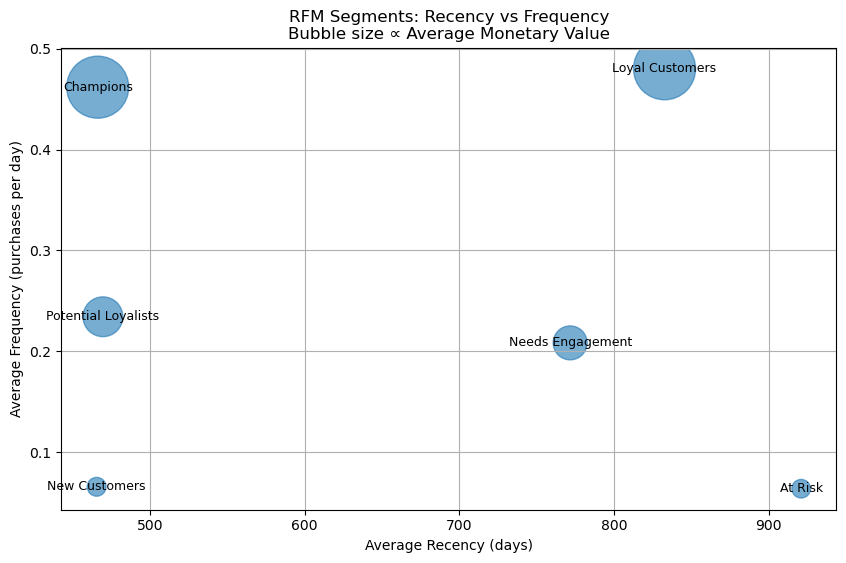

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Summarize by segment, including average Monetary
summary = (
    rfm
      .groupby('Segment')
      .agg(
         RecencyAvg   = ('Recency',   'mean'),
         FrequencyAvg = ('Frequency', 'mean'),
         MonetaryAvg  = ('Monetary',  'mean')
      )
      .reset_index()
)

# 2. Scale bubble sizes by MonetaryAvg (you can tweak the multiplier)
max_marker = 2000
summary['BubbleSize'] = (summary['MonetaryAvg'] / summary['MonetaryAvg'].max()) * max_marker

# 3. Plot Recency vs Frequency, bubble ∝ MonetaryAvg
plt.figure(figsize=(10, 6))
plt.scatter(
    summary['RecencyAvg'],
    summary['FrequencyAvg'],
    s=summary['BubbleSize'],
    alpha=0.6
)

for _, row in summary.iterrows():
    plt.text(
        row['RecencyAvg'],
        row['FrequencyAvg'],
        row['Segment'],
        ha='center',
        va='center',
        fontsize=9
    )

plt.xlabel('Average Recency (days)')
plt.ylabel('Average Frequency (purchases per day)')
plt.title('RFM Segments: Recency vs Frequency\nBubble size ∝ Average Monetary Value')
plt.grid(True)
plt.show()


• Champions: Most recent and frequent buyers with high average spend.
    
• Loyal Customers: Frequent buyers, slightly less recent, with similar value to Champions.
    
• Needs Engagement: Moderate frequency, less recent, meaning reactivation opportunities.
    
• Potential Loyalists: Recent activity with mid-level frequency and spend , encourage to convert.
    
• New Customers: Very recent but low frequency and spend. Onboarding focus.
    
• At Risk: Low activity and value, with long inactivity, meaning low recovery potential.


### 1. Revenue by RFM Segment

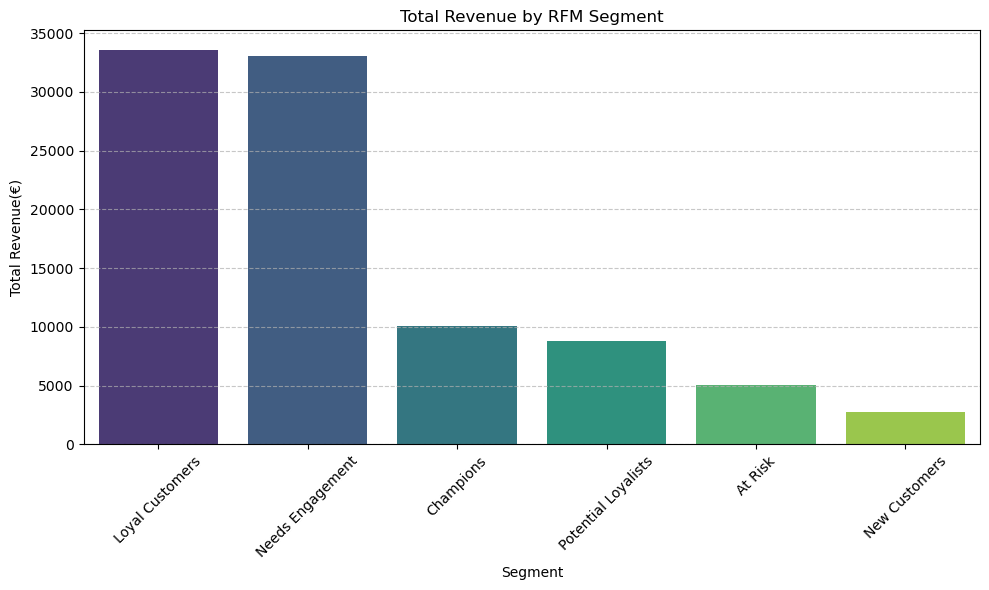

In [18]:
revenue_by_segment = rfm.groupby('Segment')['Monetary'].sum().sort_values(ascending=False).reset_index()

# Plot chart by Segment & Monetary
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_by_segment, x='Segment', y='Monetary', palette='viridis')
plt.title('Total Revenue by RFM Segment')
plt.ylabel('Total Revenue(€)')
plt.xlabel('Segment')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


• Loyal Customers generate the highest total revenue due to high purchase frequency and strong monetary value, despite lower recency than Champions.
    
• Needs Engagement is the second-highest revenue group, driven by the large number of customers in this segment. This suggests many were previously high-value but have become inactive.
    
• Champions have the highest average spend per customer but contribute less total revenue due to smaller segment size.
    


### 2. Product Preference distribution by Segment

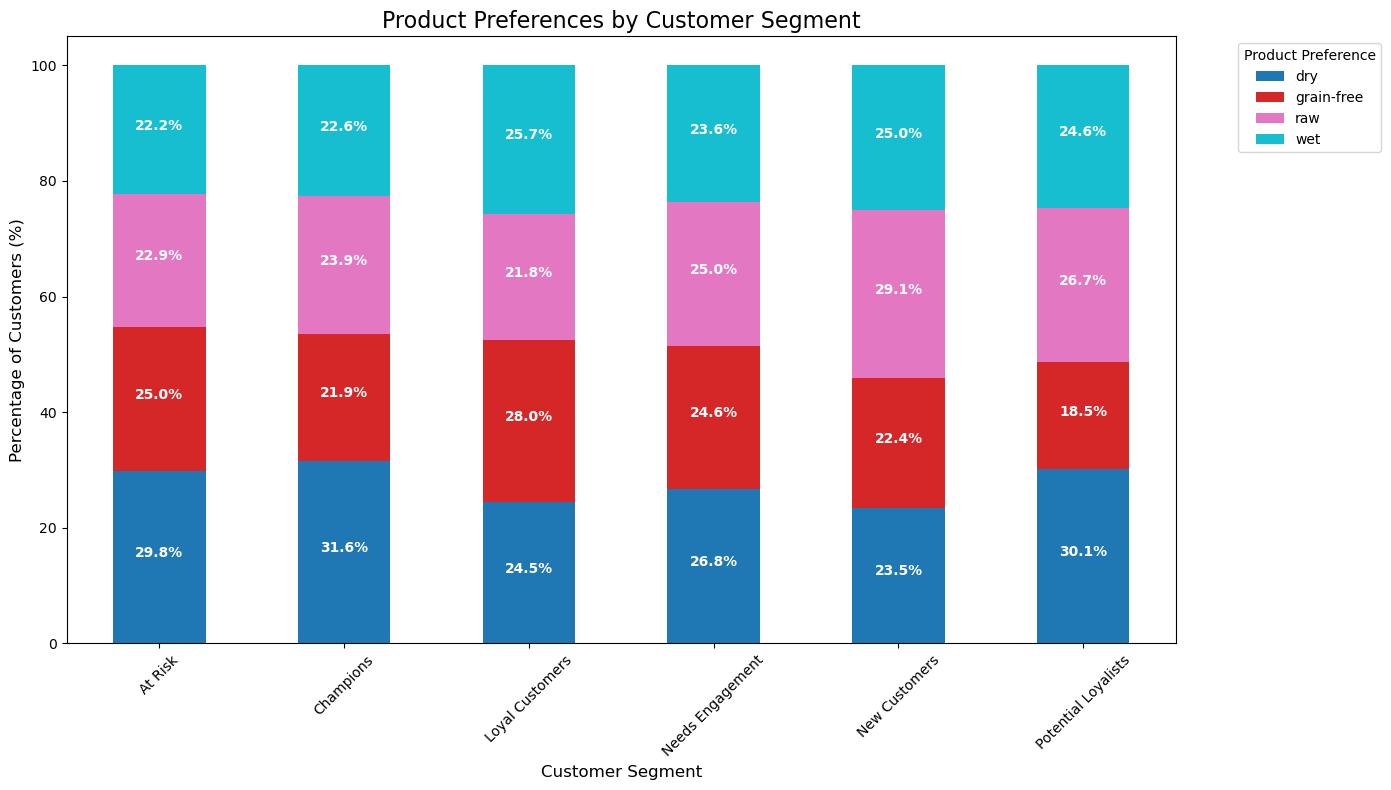

In [19]:
# Merge RFM segments with customer data to analyze product preferences
product_segment = pd.merge(
    rfm[['Customer ID', 'Segment']],
    df_customers[['Customer ID', 'Product Preference']],
    on='Customer ID',
    how='inner'
)

# Calculate percentage of each product preference within segments
segment_product_counts = pd.crosstab(
    product_segment['Segment'], 
    product_segment['Product Preference'],
    normalize='index'
) * 100 # (count of segment in product preference / total in product preference) * 100


# Plot product preference distribution by segment

plt.figure(figsize=(14, 8))

segment_product_counts.plot(
    kind='bar',
    stacked=True,
    colormap='tab10',
    ax=plt.gca()
)

plt.title('Product Preferences by Customer Segment', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Percentage of Customers (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Product Preference', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotations for percentages
for segment in segment_product_counts.index:
    total = 0
    for product in segment_product_counts.columns:
        value = segment_product_counts.loc[segment, product]
        
        #Display labels
        x = segment_product_counts.index.get_loc(segment)
        plt.text(x, total + value/2, f'{value:.1f}%', ha='center', color='white', fontweight='bold')
        total += value

plt.tight_layout()
plt.show()

• Dry food is the most purchased category across all segments.
    
• It is followed by raw food, grain-free, and wet food, respectively.
    
• Product preferences remain largely consistent, indicating RFM differences are more behavioral than product-driven.
    
• Therefore, strategies such as segmented promotions, subscription programs, and/or personalized communication across the segments should be effective.


### 3. Segment Distribution by Age Group

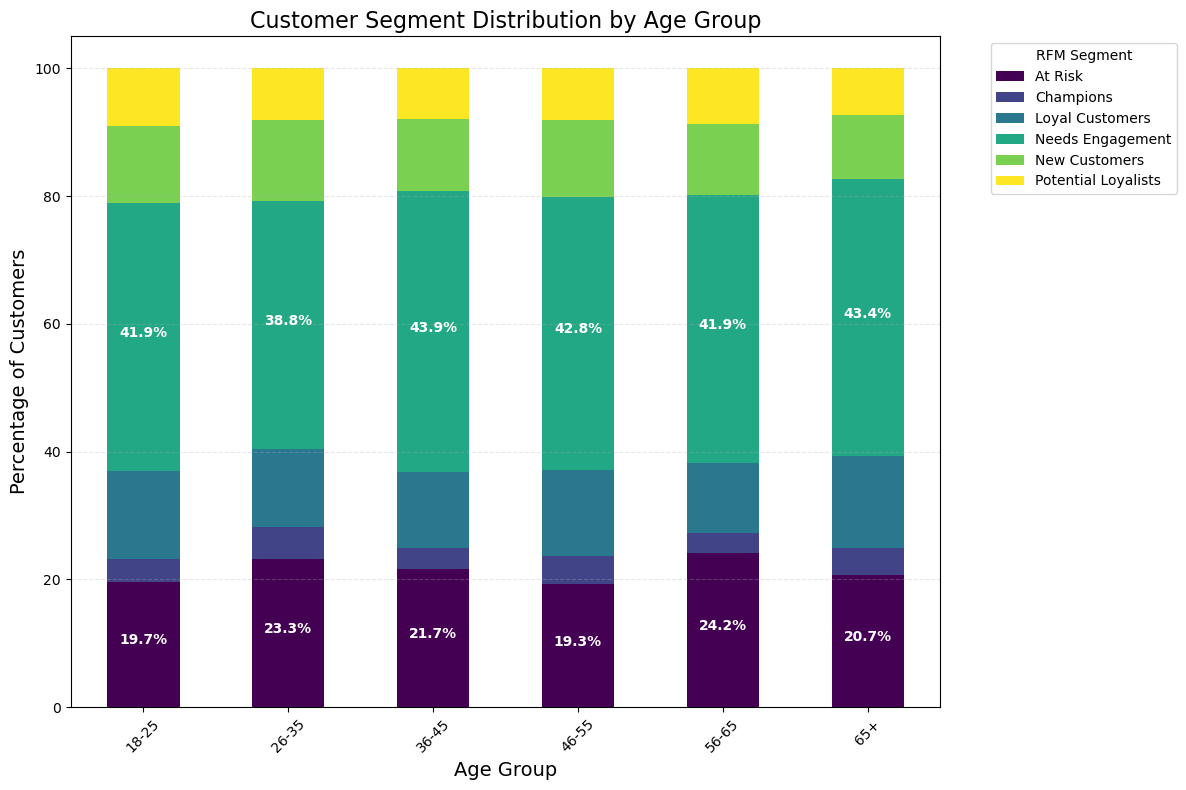

In [20]:
# Merge segments with customer age group data
age_segment = pd.merge(
    rfm[['Customer ID', 'Segment']], 
    df_customers[['Customer ID', 'Age Group']], 
    on='Customer ID', 
    how='inner'
)

# Cross-tab of age groups and segments
age_segment_counts = pd.crosstab(
    age_segment['Age Group'],
    age_segment['Segment'],
    normalize='index' # (count of segment in age group / total in age group) * 100
) * 100

# Plot age group distribution by segment
plt.figure(figsize=(12, 8))
age_segment_counts.plot(
    kind='bar',
    stacked=True,
    colormap='viridis',
    ax=plt.gca()
)

plt.title('Customer Segment Distribution by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Percentage of Customers', fontsize=14)
plt.legend(title='RFM Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add value labels for highest segments
for age_group in age_segment_counts.index:
    total = 0
    for segment in age_segment_counts.columns:
        value = age_segment_counts.loc[age_group, segment]
        if value > 15:  # Show labels for segments with >15% to avoid clutter
            x = list(age_segment_counts.index).index(age_group)
            plt.text(x, total + value/2, f'{value:.1f}%', 
                    ha='center', color='white', fontweight='bold')
        total += value

plt.tight_layout()
plt.show()

• Needs Engagement customers represent the largest share in each age group (ranging from 38.8% to 43.9%).
    
• At Risk customers are most common in the 56–60 age group (24.2%) and least common in the 18–25 group (19.7%).
    
• Champions & New customers are most concentrated among customers aged 26–35, suggesting this age group is highly engaged and valuable.

In [21]:
df_customers['Dog Breed'].unique()

array(['Poodle', 'Bulldog', 'Dachshund', 'Rottweiler', 'German Shepherd',
       'Boxer', 'Labrador', 'Siberian Husky', 'Beagle', 'Great Dane'],
      dtype=object)

### 4. Segment distribution by Dog Breed

<Figure size 1200x800 with 0 Axes>

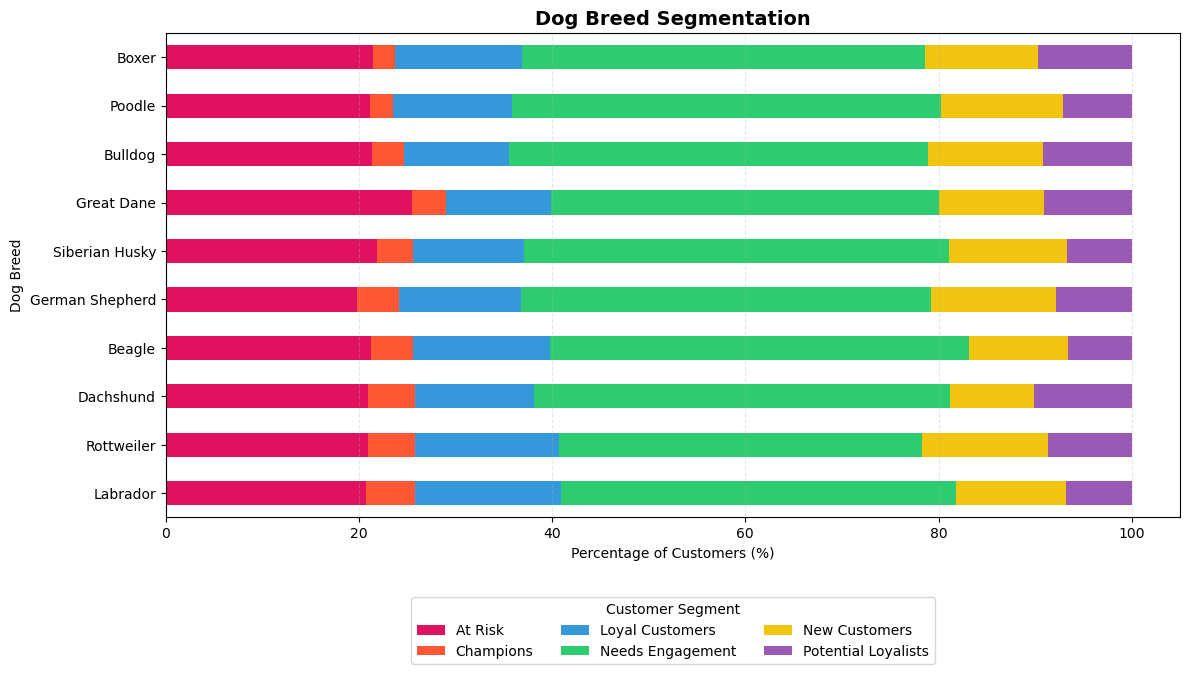

In [ ]:
# horizontal bar chart for dog breeds with distinct colors
plt.figure(figsize=(12, 8))

breed_segment = pd.merge(
    rfm[['Customer ID', 'Segment']],
    df_customers[['Customer ID', 'Dog Breed']],
    on='Customer ID',
    how='inner'
)

breed_segment_counts = pd.crosstab(
    breed_segment['Dog Breed'],
    breed_segment['Segment'],
    normalize='index'  # Calculate percentages by breed
) * 100

# Sort breeds by Champions percentage
sorted_breeds = breed_segment_counts['Champions'].sort_values(ascending=False).index

# Define a custom color palette with highly distinct colors
distinct_colors = {
    'Champions': '#FF5733',          # Orange
    'Loyal Customers': '#3498DB',    # Blue
    'Potential Loyalists': '#9B59B6', # Purple
    'Needs Engagement': '#2ECC71',   # Green
    'New Customers': '#F1C40F',      # Yellow
    'At Risk': '#E0115F'             # Red
}

# Plot horizontal stacked bars
ax = breed_segment_counts.loc[sorted_breeds].plot(
    kind='barh',                     # Horizontal bars
    stacked=True,                    # Stack the segments
    color=distinct_colors,           # Use custom color palette
    figsize=(12, 8)                  # Figure size
)

# title and labels
plt.title('Dog Breed Segmentation', fontsize=14, fontweight='bold')
plt.xlabel('Percentage of Customers (%)')
plt.ylabel('Dog Breed')

plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.legend(title='Customer Segment', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Adjust layout to make room for the legend at the bottom
plt.tight_layout(rect=[0, 0.1, 1, 0.98])
plt.show()


- Labrador owners show the highest proportion of Champions (5.1%) and Loyal Customers (15.2%), making them the most valuable breed segment for marketing high-value products.

- Great Dane owners have the highest proportion of At-Risk customers (25.5%), suggesting potential churn issues that may require targeted retention strategies.

- Needs Engagement represents the largest customer segment across all breeds (37-44%), indicating significant opportunity for reactivation campaigns.

- Rottweiler owners show a balanced distribution across valuable segments (Champions + Loyal Customers + Potential Loyalists), making them good candidates for upselling programs.

- Breed preference correlates with customer value - premium breeds like Labradors and Rottweilers have stronger representation in high-value segments compared to other breeds.




## CLV analysis

### CLV=(Average Purchase Value)×(Purchase Frequency)×(Customer Lifespan)

In [23]:
df_clv = rfm[['Customer ID', 'Frequency', 'Monetary']].copy()

# 3. Compute simple 2-year CLV by extrapolating monthly spend
#    CLV_simple = average monthly spend × 24 months
df_clv['CLV_2yr_simple'] = (df_clv['Monetary'] * 24).round(2)

# 4. (Optional) Show components: AOV and purchase rate
df_clv['AOV'] = (df_clv['Monetary'] / df_clv['Frequency']).round(2)       # € per purchase
df_clv['Purchase_Rate'] = df_clv['Frequency']                             # purchases per month
df_clv['CLV_2yr_by_components'] = (df_clv['AOV'] * df_clv['Purchase_Rate'] * 24).round(2)

# 5. View the result
print(df_clv.head())

                            Customer ID  Frequency  Monetary  CLV_2yr_simple  \
0  d0a2f021-43b8-49f4-bca3-830a9b29e17d     0.3333    9.0296          216.71   
1  cfb7ef4f-c51f-48a0-bde3-b4b682fbb356     0.1667    9.7421          233.81   
2  345bfa01-af7d-4bab-a355-2f9664101968     0.2917   35.0333          840.80   
3  062ee64d-c213-4cfb-a16d-72cbb692078f     0.0417    5.5500          133.20   
4  c584e53d-3728-4233-9d19-6aa2d0ac40f7     0.1667   22.1321          531.17   

      AOV  Purchase_Rate  CLV_2yr_by_components  
0   27.09         0.3333                 216.70  
1   58.44         0.1667                 233.81  
2  120.10         0.2917                 840.80  
3  133.09         0.0417                 133.20  
4  132.77         0.1667                 531.19  


### 1. Pareto Analysis - CLV by Customer Segment

In [24]:
# Add segment information from the rfm dataframe
df_clv_with_segment = pd.merge(
    df_clv,
    rfm[['Customer ID', 'Segment']],
    on='Customer ID',
    how='inner'
)

# Segment-level CLV summary for Pareto analysis
segment_clv = df_clv_with_segment.groupby('Segment').agg(
    Total_CLV=('CLV_2yr_simple', 'sum'),
    Avg_CLV=('CLV_2yr_simple', 'mean'),
    Customer_Count=('Customer ID', 'count')
).reset_index()

# Sort by total CLV and calculate percentages and cumulative percentages
segment_clv = segment_clv.sort_values('Total_CLV', ascending=False)
segment_clv['CLV_Percentage'] = (segment_clv['Total_CLV'] / segment_clv['Total_CLV'].sum() * 100).round(1)
segment_clv['Cumulative_Percentage'] = segment_clv['CLV_Percentage'].cumsum()

C:\Users\sahir\AppData\Local\Temp\ipykernel_16736\2164290636.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([f'{y:.0f}%' for y in ax2.get_yticks()])
C:\Users\sahir\AppData\Local\Temp\ipykernel_16736\2164290636.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([f'€{y:.0f}' for y in ax1.get_yticks()])


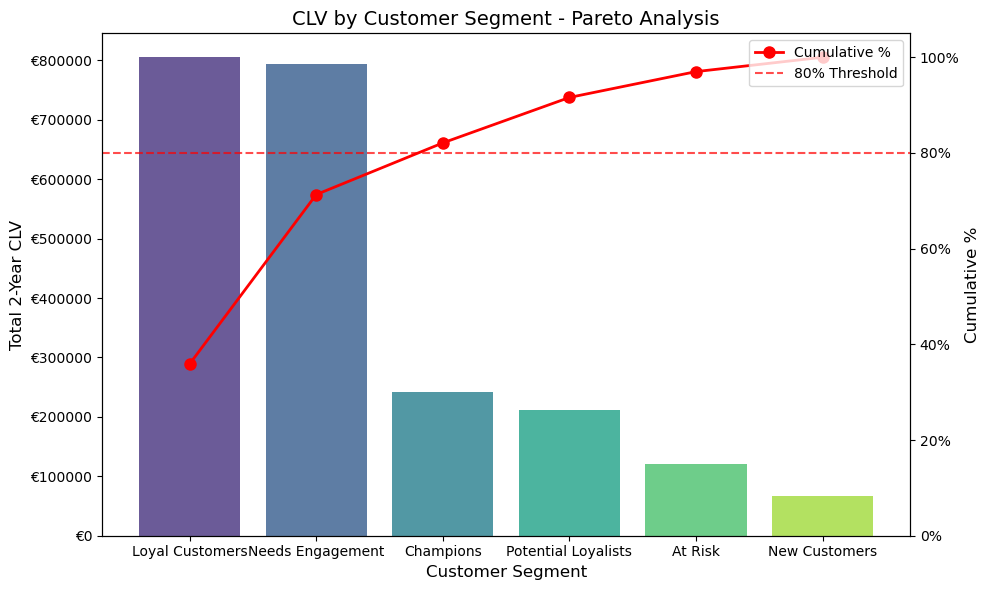

In [25]:
# Pareto chart 
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot bars for total CLV
bars = ax1.bar(
    segment_clv['Segment'], 
    segment_clv['Total_CLV'],
    color=sns.color_palette('viridis', len(segment_clv)),
    alpha=0.8
)

# Plot line for cumulative percentage
ax2.plot(
    segment_clv['Segment'],
    segment_clv['Cumulative_Percentage'],
    'ro-',
    linewidth=2,
    markersize=8
)

# Add reference line at 80%
ax2.axhline(y=80, color='red', linestyle='--', alpha=0.7)


ax1.set_xlabel('Customer Segment', fontsize=12)
ax1.set_ylabel('Total 2-Year CLV', fontsize=12)
ax2.set_ylabel('Cumulative %', fontsize=12)
ax1.set_title('CLV by Customer Segment - Pareto Analysis', fontsize=14)


# Set y-axis limits for percentage
ax2.set_ylim([0, 105])

# Rotate x-axis labels
plt.xticks(rotation=45)

# Format y-axis labels
ax2.set_yticklabels([f'{y:.0f}%' for y in ax2.get_yticks()])
ax1.set_yticklabels([f'€{y:.0f}' for y in ax1.get_yticks()])

# Add legend
ax2.legend(
    ['Cumulative %', '80% Threshold'], 
    loc='upper right',
    frameon=True
)

# Formatting
plt.tight_layout()
plt.show()


In [26]:
df_customers.head()

,Customer ID,Age Group,Location,Gender,Family with Children,Dog Breed,Purchase Frequency,Average Spend,Product Preference,Loyalty Program Member,Last Purchase Date,Days Since Last Purchase
0,d0a2f021-43b8-49f4-bca3-830a9b29e17d,56-65,suburban,1,1,Poodle,weekly,30.25,grain-free,1,2022-09-19,958
1,cfb7ef4f-c51f-48a0-bde3-b4b682fbb356,56-65,urban,0,1,Bulldog,monthly,57.03,wet,1,2023-05-03,732
2,345bfa01-af7d-4bab-a355-2f9664101968,18-25,suburban,0,1,Dachshund,weekly,105.84,raw,0,2023-07-14,660
3,062ee64d-c213-4cfb-a16d-72cbb692078f,65+,urban,1,1,Rottweiler,monthly,97.68,grain-free,0,2022-11-03,913
4,c584e53d-3728-4233-9d19-6aa2d0ac40f7,18-25,urban,1,0,German Shepherd,monthly,135.36,dry,1,2023-11-21,530


### 2. Loyalty Program 

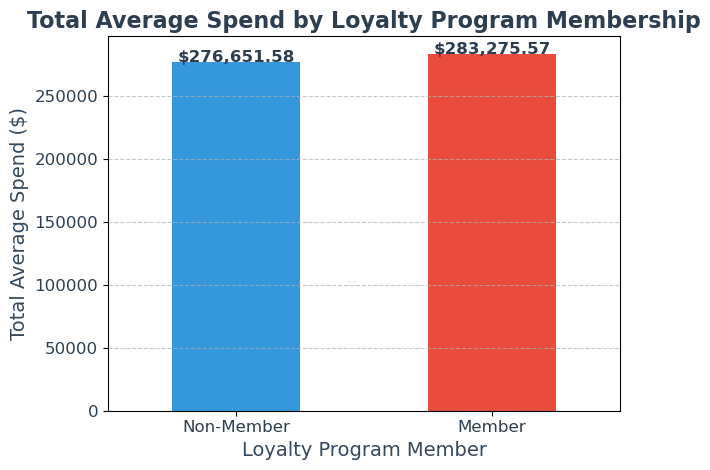

In [27]:
# just to see if our loyalty program is working or not

df_customers.groupby('Loyalty Program Member')['Average Spend'].sum().plot(kind='bar', color=['#3498db', '#e74c3c'])

# Customize plot
plt.title('Total Average Spend by Loyalty Program Membership', fontsize=16, weight='bold', color='#2c3e50')
plt.xlabel('Loyalty Program Member', fontsize=14, color='#34495e')
plt.ylabel('Total Average Spend ($)', fontsize=14, color='#34495e')
plt.xticks(ticks=[0, 1], labels=['Non-Member', 'Member'], rotation=0, fontsize=12, color='#2c3e50')
plt.yticks(fontsize=12, color='#2c3e50')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optional: Add value labels on the bars
for i, v in enumerate(df_customers.groupby('Loyalty Program Member')['Average Spend'].sum()):
    plt.text(i, v + 0.1, f"${v:,.2f}", ha='center', fontsize=12, color='#2c3e50', weight='bold')

# Show the plot
plt.tight_layout()
plt.show()

In [28]:
df_customers.groupby('Loyalty Program Member')['Customer ID'].count()

Loyalty Program Member
0    2459
1    2541
Name: Customer ID, dtype: int64

In [29]:
df_cluster = df_customers.copy()
df_cluster

,Customer ID,Age Group,Location,Gender,Family with Children,Dog Breed,Purchase Frequency,Average Spend,Product Preference,Loyalty Program Member,Last Purchase Date,Days Since Last Purchase
0,d0a2f021-43b8-49f4-bca3-830a9b29e17d,56-65,suburban,1,1,Poodle,weekly,30.25,grain-free,1,2022-09-19,958
1,cfb7ef4f-c51f-48a0-bde3-b4b682fbb356,56-65,urban,0,1,Bulldog,monthly,57.03,wet,1,2023-05-03,732
2,345bfa01-af7d-4bab-a355-2f9664101968,18-25,suburban,0,1,Dachshund,weekly,105.84,raw,0,2023-07-14,660
3,062ee64d-c213-4cfb-a16d-72cbb692078f,65+,urban,1,1,Rottweiler,monthly,97.68,grain-free,0,2022-11-03,913
4,c584e53d-3728-4233-9d19-6aa2d0ac40f7,18-25,urban,1,0,German Shepherd,monthly,135.36,dry,1,2023-11-21,530
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,24839ce9-94f2-4d1d-a28f-91150312023b,65+,urban,0,1,Great Dane,monthly,58.19,dry,1,2023-02-14,810
4996,333375e9-0233-4015-bbe5-7a42a1d75952,56-65,urban,0,1,Siberian Husky,quarterly,152.92,grain-free,0,2023-03-20,776
4997,7a331a12-b511-4ba5-b51f-6bd161bdaa27,65+,suburban,1,0,Labrador,quarterly,190.71,raw,1,2022-10-04,943
4998,0c738bab-e07c-4b28-9b8e-acd4af6b27b7,36-45,suburban,1,0,Dachshund,weekly,22.47,dry,0,2022-06-12,1057


In [30]:
# Generate dummy variables for 'Location' and convert to int type
location_dummies = pd.get_dummies(df_cluster['Location']).astype(int)

# Drop the original 'Location' column
df_cluster = pd.concat([df_cluster.drop('Location', axis=1), location_dummies], axis=1)

# Display the updated DataFrame
df_cluster

,Customer ID,Age Group,Gender,Family with Children,Dog Breed,Purchase Frequency,Average Spend,Product Preference,Loyalty Program Member,Last Purchase Date,Days Since Last Purchase,suburban,urban
0,d0a2f021-43b8-49f4-bca3-830a9b29e17d,56-65,1,1,Poodle,weekly,30.25,grain-free,1,2022-09-19,958,1,0
1,cfb7ef4f-c51f-48a0-bde3-b4b682fbb356,56-65,0,1,Bulldog,monthly,57.03,wet,1,2023-05-03,732,0,1
2,345bfa01-af7d-4bab-a355-2f9664101968,18-25,0,1,Dachshund,weekly,105.84,raw,0,2023-07-14,660,1,0
3,062ee64d-c213-4cfb-a16d-72cbb692078f,65+,1,1,Rottweiler,monthly,97.68,grain-free,0,2022-11-03,913,0,1
4,c584e53d-3728-4233-9d19-6aa2d0ac40f7,18-25,1,0,German Shepherd,monthly,135.36,dry,1,2023-11-21,530,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,24839ce9-94f2-4d1d-a28f-91150312023b,65+,0,1,Great Dane,monthly,58.19,dry,1,2023-02-14,810,0,1
4996,333375e9-0233-4015-bbe5-7a42a1d75952,56-65,0,1,Siberian Husky,quarterly,152.92,grain-free,0,2023-03-20,776,0,1
4997,7a331a12-b511-4ba5-b51f-6bd161bdaa27,65+,1,0,Labrador,quarterly,190.71,raw,1,2022-10-04,943,1,0
4998,0c738bab-e07c-4b28-9b8e-acd4af6b27b7,36-45,1,0,Dachshund,weekly,22.47,dry,0,2022-06-12,1057,1,0


In [31]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Customer ID               5000 non-null   object        
 1   Age Group                 5000 non-null   object        
 2   Gender                    5000 non-null   int64         
 3   Family with Children      5000 non-null   int32         
 4   Dog Breed                 5000 non-null   object        
 5   Purchase Frequency        5000 non-null   object        
 6   Average Spend             5000 non-null   float64       
 7   Product Preference        5000 non-null   object        
 8   Loyalty Program Member    5000 non-null   int64         
 9   Last Purchase Date        5000 non-null   datetime64[ns]
 10  Days Since Last Purchase  5000 non-null   int64         
 11  suburban                  5000 non-null   int32         
 12  urban               

In [32]:
!pip install kmodes

  Obtaining dependency information for kmodes from https://files.pythonhosted.org/packages/1a/a8/0d3bf6f3340cbcb8cf4ad02c306d157af8f09ce86aadf5346e00605870dd/kmodes-0.12.2-py2.py3-none-any.whl.metadata


### 3. Customer Clustering

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Assuming df_cluster is your DataFrame
df_cluster = df_cluster.copy()

# Step 1: One-hot encode categorical features that aren't already encoded
categorical_columns = ['Age Group', 'Dog Breed', 'Purchase Frequency', 'Product Preference']
df_encoded = pd.get_dummies(df_cluster[categorical_columns])

# Step 2: Standardize numerical features
numerical_columns = ['Gender', 'Family with Children', 'Average Spend', 
                     'Loyalty Program Member', 'Days Since Last Purchase']

scaler = StandardScaler()
df_numerical = df_cluster[numerical_columns]
df_numerical_scaled = scaler.fit_transform(df_numerical)

# Step 3: Include the one-hot encoded suburban and urban columns
df_combined = pd.concat([df_encoded, pd.DataFrame(df_numerical_scaled, columns=numerical_columns), 
                         df_cluster[['suburban', 'urban']]], axis=1)

# Step 4: Determine the optimal number of clusters using the Elbow Method and Silhouette Score

# Create lists to store the cost (inertia) and silhouette scores for different values of K
costs = []
sil_scores = []

# # Try different values of K (e.g., from 2 to 10 clusters)
# for k in range(2, 11):
#     kproto = KPrototypes(n_clusters=k, init='Cao', n_init=10)
#     kproto.fit(df_combined, categorical=[i for i in range(df_encoded.shape[1])])  # Indices of the categorical columns
    
#     # Get the cost (inertia)
#     costs.append(kproto.cost_)
    
#     # Compute silhouette score (only works with numerical data)
#     if k > 1:  # Silhouette score is not defined for 1 cluster
#         cluster_labels = kproto.labels_
#         sil_score = silhouette_score(df_combined, cluster_labels)
#         sil_scores.append(sil_score)
#     else:
#         sil_scores.append(None)

# # Step 5: Plot the Elbow Method and Silhouette Scores
# # Elbow Method plot (cost/inertia vs number of clusters)
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.plot(range(2, 11), costs, marker='o', color='b')
# plt.title('Elbow Method (Cost vs. Number of Clusters)', fontsize=16)
# plt.xlabel('Number of Clusters (K)', fontsize=12)
# plt.ylabel('Cost (Inertia)', fontsize=12)

# # Silhouette Score plot
# plt.subplot(1, 2, 2)
# plt.plot(range(2, 11), sil_scores, marker='o', color='g')
# plt.title('Silhouette Score vs. Number of Clusters', fontsize=16)
# plt.xlabel('Number of Clusters (K)', fontsize=12)
# plt.ylabel('Silhouette Score', fontsize=12)

# plt.tight_layout()
# plt.show()

# Based on the Elbow Method and Silhouette Score, choose the optimal K
# Let's assume the optimal K is determined visually or based on your findings
optimal_k = 3

# Step 6: Apply K-prototypes clustering with the chosen optimal number of clusters
kproto = KPrototypes(n_clusters=optimal_k, init='Cao', n_init=10)
df_combined['Cluster'] = kproto.fit_predict(df_combined, categorical=[i for i in range(df_encoded.shape[1])])

# Step 7: Assign cluster labels back to the original DataFrame
df_cluster['Cluster'] = df_combined['Cluster']

# Display the resulting DataFrame with cluster labels
print(df_cluster[['Customer ID', 'Cluster']].head())


                            Customer ID  Cluster
0  d0a2f021-43b8-49f4-bca3-830a9b29e17d        2
1  cfb7ef4f-c51f-48a0-bde3-b4b682fbb356        2
2  345bfa01-af7d-4bab-a355-2f9664101968        0
3  062ee64d-c213-4cfb-a16d-72cbb692078f        0
4  c584e53d-3728-4233-9d19-6aa2d0ac40f7        1


#### 3.1 PCA 

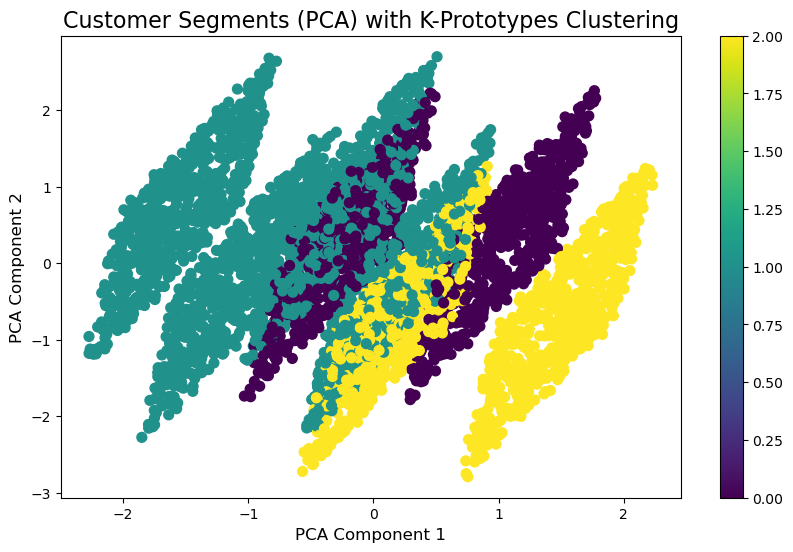

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Use PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_combined.drop('Cluster', axis=1))

# Plot the clusters in 2D
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df_cluster['Cluster'], cmap='viridis', s=50)
plt.title("Customer Segments (PCA) with K-Prototypes Clustering", fontsize=16)
plt.xlabel("PCA Component 1", fontsize=12)
plt.ylabel("PCA Component 2", fontsize=12)

# Add a color bar to indicate the cluster
plt.colorbar(scatter)
plt.show()


#### 3.2 Cluster Distribution

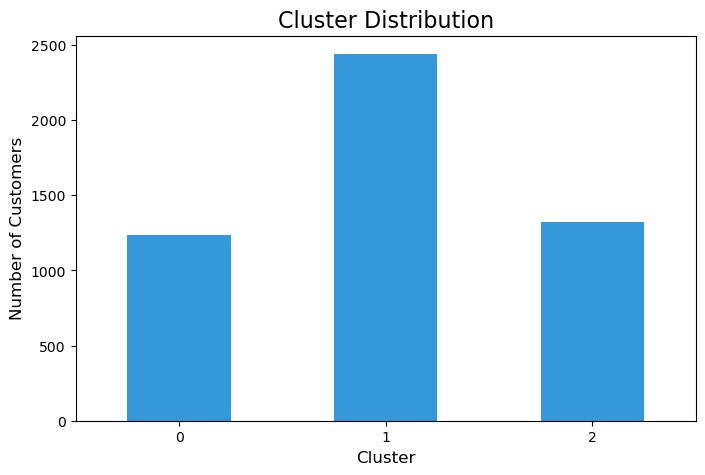

In [35]:
# Plot the distribution of clusters
plt.figure(figsize=(8, 5))
df_cluster['Cluster'].value_counts().sort_index().plot(kind='bar', color='#3498db')
plt.title('Cluster Distribution', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.show()


#### 3.3 Spending Patterns by Cluster

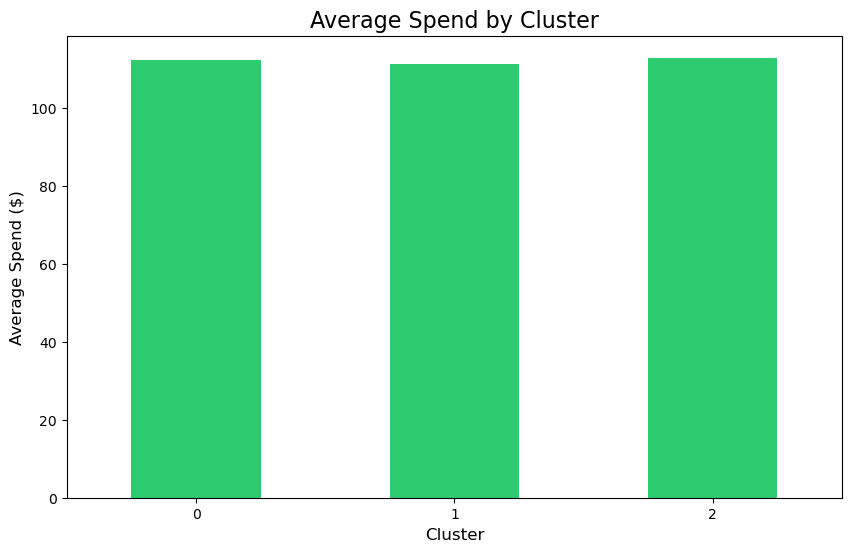

In [36]:
# Plot the mean Average Spend for each cluster
plt.figure(figsize=(10, 6))
df_cluster.groupby('Cluster')['Average Spend'].mean().plot(kind='bar', color='#2ecc71')
plt.title('Average Spend by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Average Spend ($)', fontsize=12)
plt.xticks(rotation=0)
plt.show()


#### 3.4 Age Group Distribution by Cluster

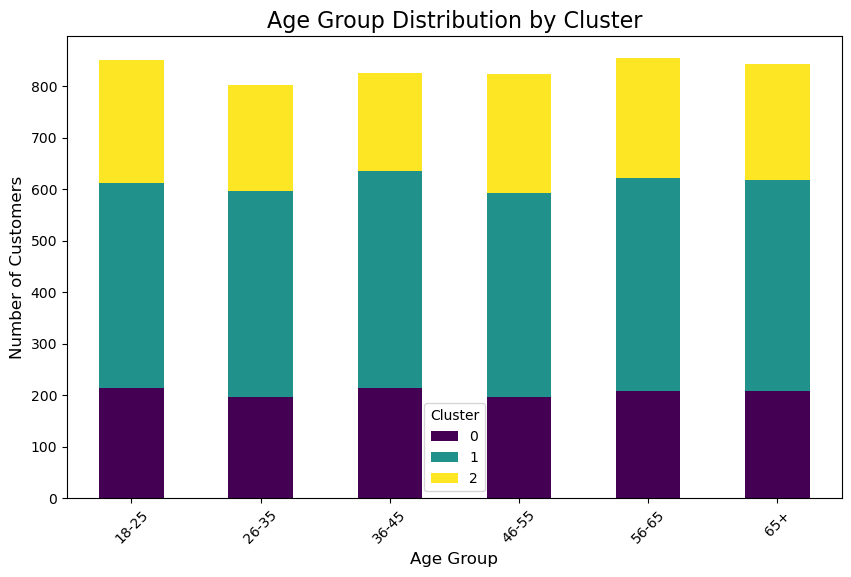

In [37]:
# Plot the distribution of Age Group in each cluster
age_group_distribution = pd.crosstab(df_cluster['Age Group'], df_cluster['Cluster'])
age_group_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Age Group Distribution by Cluster', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [38]:
# Analyze the spending behavior (numerical features)
spending_columns = ['Average Spend', 'Days Since Last Purchase', 'Loyalty Program Member']

# Calculate mean for numerical features across clusters
cluster_spending_behavior = df_cluster.groupby('Cluster')[spending_columns].mean()

# Display spending behavior summary
print(cluster_spending_behavior)


         Average Spend  Days Since Last Purchase  Loyalty Program Member
Cluster                                                                 
0           112.394765                736.496764                 0.00000
1           111.268627                737.171721                 0.49877
2           112.924298                743.496979                 1.00000


In [39]:
# Analyze the mode for categorical features within each cluster
categorical_columns = ['Age Group', 'Purchase Frequency', 'suburban', 'urban']

# Get the mode of categorical features for each cluster
cluster_categorical_behavior = df_cluster.groupby('Cluster')[categorical_columns].agg(lambda x: x.mode()[0])

# Display categorical behavior summary
print(cluster_categorical_behavior)


        Age Group Purchase Frequency  suburban  urban
Cluster                                              
0           18-25          quarterly         1      0
1           36-45            monthly         0      1
2           18-25             weekly         1      0
